# Let's try to read in our FRAP data and generate some plots

In [34]:
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
#Define the folder containing your file of interest,
#Currently this is './' the current folder
input_folder = "C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_FRAP_Exp002_Results/"

In [73]:
files = listdir(input_folder)
files

['EML4-ALKv1_FRAP_10_Results.csv',
 'EML4-ALKv1_FRAP_11_Results.csv',
 'EML4-ALKv1_FRAP_12_Results.csv',
 'EML4-ALKv1_FRAP_13_Results.csv',
 'EML4-ALKv1_FRAP_14_Results.csv',
 'EML4-ALKv1_FRAP_16_Results.csv',
 'EML4-ALKv1_FRAP_1_Results.csv',
 'EML4-ALKv1_FRAP_2_Results.csv',
 'EML4-ALKv1_FRAP_3_Results.csv',
 'EML4-ALKv1_FRAP_4_Results.csv',
 'EML4-ALKv1_FRAP_5_Results.csv',
 'EML4-ALKv1_FRAP_6_Results.csv',
 'EML4-ALKv1_FRAP_8_Results.csv',
 'EML4-ALKv1_FRAP_9_Results.csv',
 'EML4-ALKv3_FRAP_10_Box1_Results.csv',
 'EML4-ALKv3_FRAP_2_Box1_Results.csv',
 'EML4-ALKv3_FRAP_3_Box1_Results.csv',
 'EML4-ALKv3_FRAP_5_Box1_Results.csv',
 'EML4-ALKv3_FRAP_6_Box1_Results.csv',
 'EML4-ALKv3_FRAP_7_Box1_Results.csv',
 'EML4-ALKv3_FRAP_8_Box1_Results.csv',
 'EML4-ALKv3_FRAP_9_Box1_Results.csv',
 'EML4-ALKv5_FRAP_1_Results.csv',
 'Ret_FRAP_1_Results.csv',
 'Ret_FRAP_2_Results.csv',
 'Ret_FRAP_3_Results.csv',
 'Ret_FRAP_4_Results.csv']

In [74]:
#Extract information from a .csv file
file_index = 0 
df = pd.read_csv(input_folder+files[file_index])
title = files[file_index]

names = list(df.columns)
names[0]='Frame'
names

df.columns = names

In [75]:
def getdata(input_folder, file):
    
    df = pd.read_csv(input_folder+file)
    title = files[file_index]

    names = list(df.columns)
    names[0]='Frame'
    names

    df.columns = names
    
    return df

In [76]:
df

,Frame,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Mean(Bgd)
0,1,274.639,127.306,409.495,124.577,113.549
1,2,270.433,126.480,398.412,123.888,113.761
2,3,262.722,127.934,397.856,124.663,114.181
3,4,268.619,126.985,398.464,125.776,113.311
4,5,266.000,127.556,396.103,123.566,113.304
...,...,...,...,...,...,...
95,96,132.186,122.066,374.309,122.138,113.133
96,97,130.464,121.765,370.227,121.684,113.843
97,98,131.309,122.602,369.732,121.684,114.051
98,99,129.866,121.138,371.670,121.684,113.973


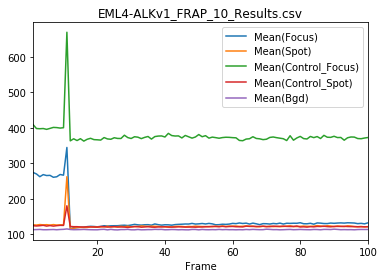

In [77]:
df.plot(x='Frame');
plt.title(title);

In [78]:
#Subtract Background
sub = df.subtract(df['Mean(Bgd)'], axis=0)
sub.Frame = df.Frame
sub.drop(columns='Mean(Bgd)', inplace=True)
sub

,Frame,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot)
0,1,161.090,13.757,295.946,11.028
1,2,156.672,12.719,284.651,10.127
2,3,148.541,13.753,283.675,10.482
3,4,155.308,13.674,285.153,12.465
4,5,152.696,14.252,282.799,10.262
...,...,...,...,...,...
95,96,19.053,8.933,261.176,9.005
96,97,16.621,7.922,256.384,7.841
97,98,17.258,8.551,255.681,7.633
98,99,15.893,7.165,257.697,7.711


In [248]:
def subtract_background(df):
    
    sub = df.subtract(df['Mean(Bgd)'], axis=0)
    sub.Frame = df.Frame
    sub.drop(columns='Mean(Bgd)', inplace=True)
    return sub

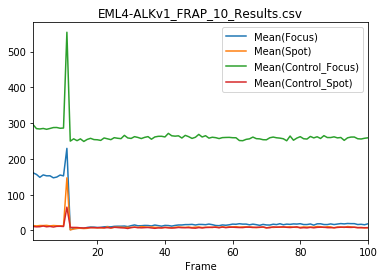

In [79]:
sub.plot(x='Frame');
plt.title(title);

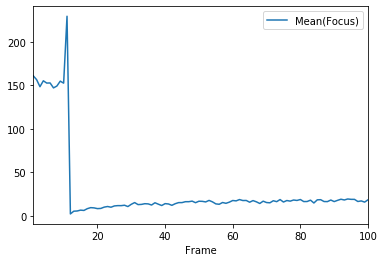

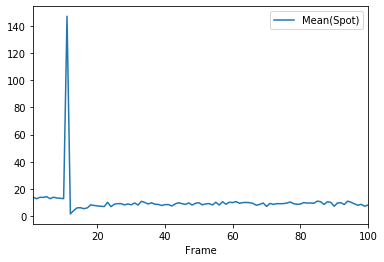

In [80]:
sub.plot(x='Frame', y='Mean(Focus)');
sub.plot(x='Frame', y='Mean(Spot)');

In [81]:
#Get prebleach conditions
pre = df.iloc[0:7,1:].mean()
pre = pd.DataFrame(pre).T
pre

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Mean(Bgd)
0,267.144429,127.203571,400.106,124.434571,113.675714


In [63]:
pre['Target Ratio']  = pre['Mean(Focus)'] / pre['Mean(Spot)']
pre['Control Ratio'] = pre['Mean(Control_Focus)'] / pre['Mean(Control_Spot)']
pre

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Mean(Bgd),Target Ratio,Control Ratio
0,267.144429,127.203571,400.106,124.434571,113.675714,2.100133,3.215393


In [100]:
#Get final conditions for all files.
final = df.iloc[80:100,1:].mean()
final = pd.DataFrame(final).T
final

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Mean(Bgd)
0,362.90975,347.75685,466.98905,417.2299,117.83695


In [101]:
final['Target Ratio']  = final['Mean(Focus)'] / final['Mean(Spot)']
final['Control Ratio'] = final['Mean(Control_Focus)'] / final['Mean(Control_Spot)']
final

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Mean(Bgd),Target Ratio,Control Ratio
0,362.90975,347.75685,466.98905,417.2299,117.83695,1.043573,1.119261


In [67]:
#Define a function to do this

In [83]:
def prebleach(df):
    
    pre = df.iloc[0:7,1:].mean()
    pre = pd.DataFrame(pre).T
        
#     pre['Target Ratio']  = pre['Mean(Focus)'] / pre['Mean(Spot)']
#     pre['Control Ratio'] = pre['Mean(Control_Focus)'] / pre['Mean(Control_Spot)']
    
    return pre

In [93]:
prebleach_values = list()

for file in files:
    
    #print(file)
    
    df = getdata(input_folder, file)
     
    prebleach_values.append(prebleach(df))
    
prebleach_values = pd.concat(prebleach_values)
prebleach_values.insert(0, 'File', files)
prebleach_values.reset_index(inplace=True, drop=True)
prebleach_values

c:\users\david brown\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


,File,Mean(Bgd),Mean(Control_Focus),Mean(Control_Spot),Mean(Focus),Mean(Spot)
0,EML4-ALKv1_FRAP_10_Results.csv,113.675714,400.106000,124.434571,267.144429,127.203571
1,EML4-ALKv1_FRAP_11_Results.csv,114.210000,205.458000,120.193286,189.503714,122.808286
2,EML4-ALKv1_FRAP_12_Results.csv,113.343143,209.415143,140.734000,241.954571,142.179286
3,EML4-ALKv1_FRAP_13_Results.csv,114.471429,239.760000,177.461286,164.263714,155.141429
4,EML4-ALKv1_FRAP_14_Results.csv,115.136429,2070.260714,274.183714,1389.321286,216.406714
5,EML4-ALKv1_FRAP_16_Results.csv,114.884429,753.751143,135.642143,3821.516857,222.020429
6,EML4-ALKv1_FRAP_1_Results.csv,114.104714,240.492000,124.025429,317.131143,130.972429
7,EML4-ALKv1_FRAP_2_Results.csv,113.385143,542.163429,143.269571,414.487429,163.597714
8,EML4-ALKv1_FRAP_3_Results.csv,113.818714,207.461000,136.815571,444.892571,140.257143
9,EML4-ALKv1_FRAP_4_Results.csv,114.576714,331.360714,145.720286,564.296000,151.804571


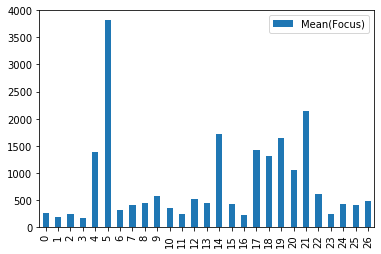

In [97]:
prebleach_values.plot.bar(y='Mean(Focus)');

In [98]:
#We really need prebleach, postbleach and final values for all each file

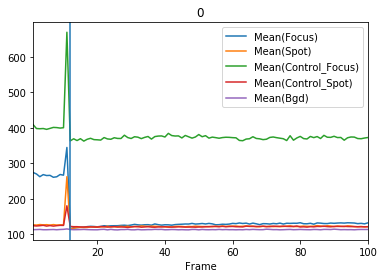

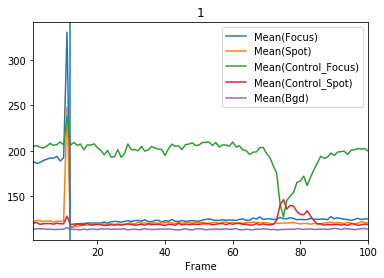

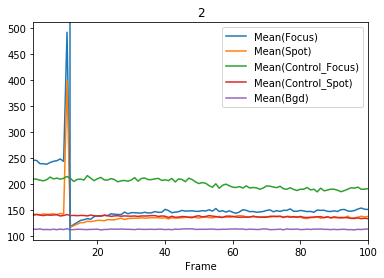

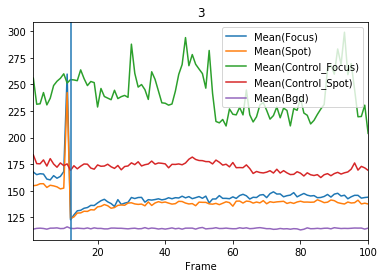

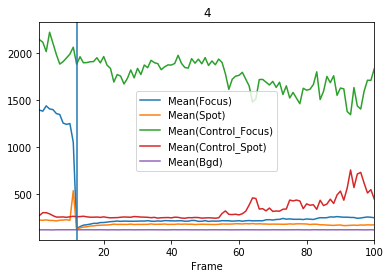

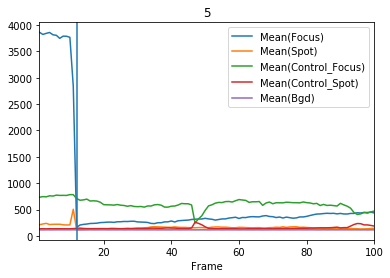

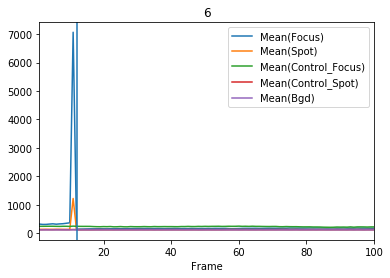

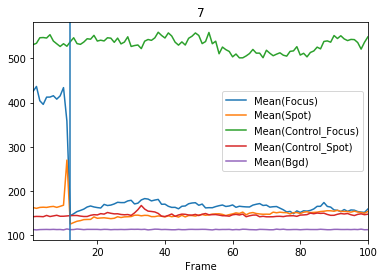

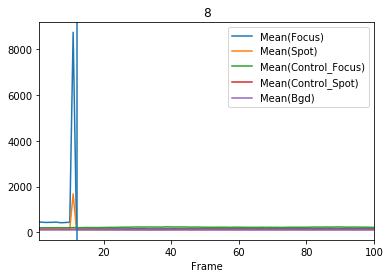

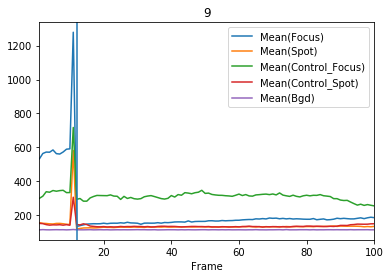

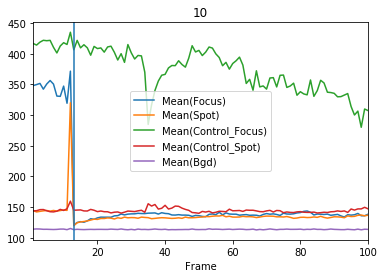

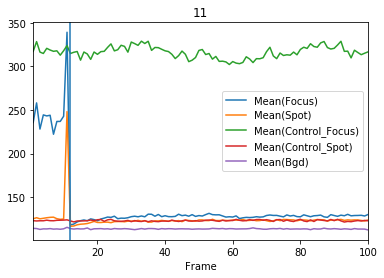

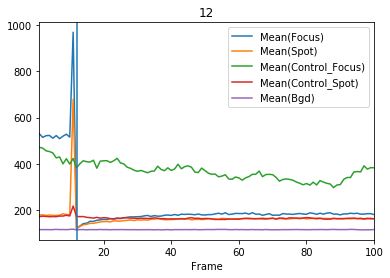

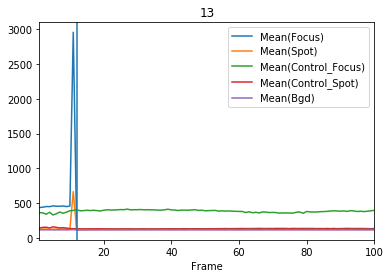

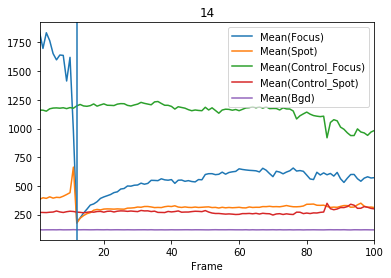

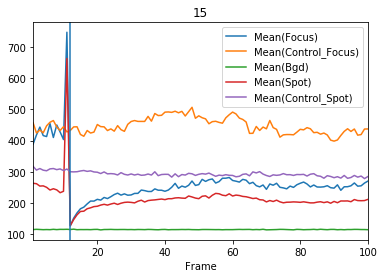

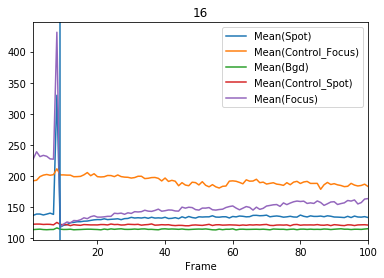

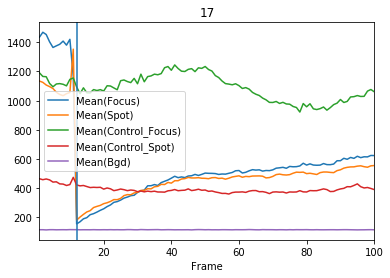

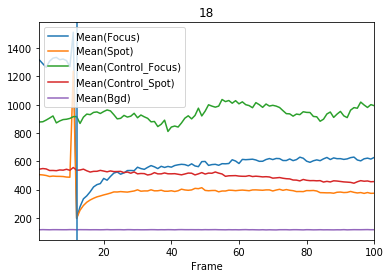

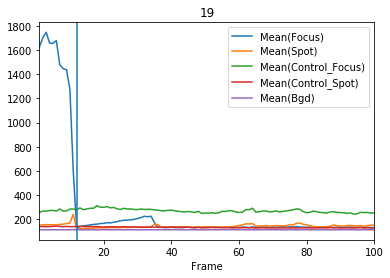

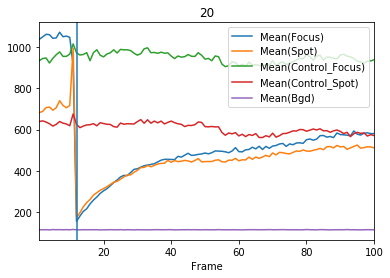

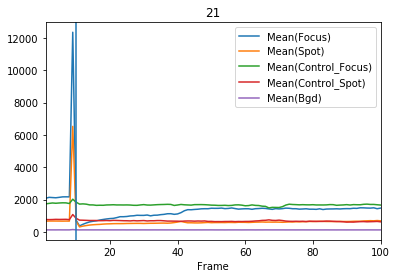

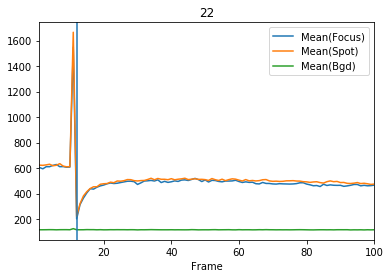

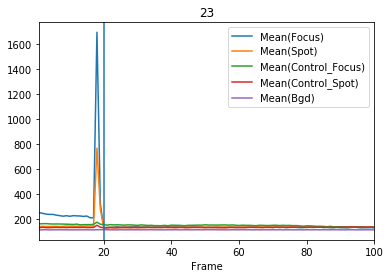

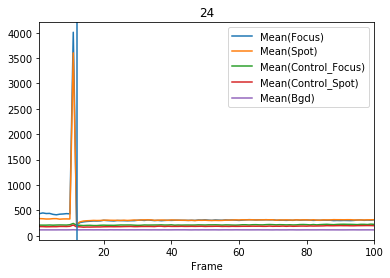

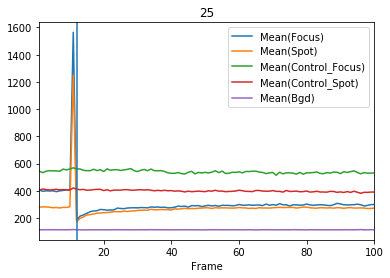

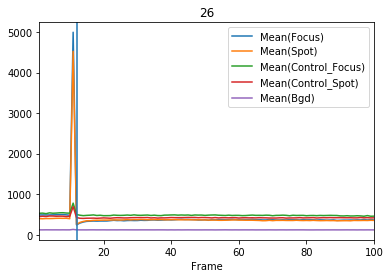

In [115]:
#In most cases the the bleach frame is 12.
for n, file in enumerate(files):

    df = getdata(input_folder, file)
    df.plot(x='Frame');
    plt.axvline(t0_frames[n])
    plt.title(n);

In [108]:
# Let's generate a list of t0 frames for these files.
t0_frames = [12]*len(files)

In [114]:
# We can edit the files with distinct t0 frames.
t0_frames[10]=13
t0_frames[16]=9
t0_frames[21]=10
t0_frames[23]=20

In [116]:
# Now we can get the post bleach value for every file

In [117]:
def postbleach(df, t0):
    
    post = df.iloc[t0, 1:]
    post = pd.DataFrame(post).T
    
    return post

In [122]:
t0_values = list()

for n, file in enumerate(files):

    df = getdata(input_folder, file)
    
    t0_values.append(postbleach(df, t0_frames[n]))
    
t0_values = pd.concat(t0_values)
t0_values.insert(0, 'File', files)
t0_values.reset_index(inplace=True, drop=True)
t0_values

c:\users\david brown\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,File,Mean(Bgd),Mean(Control_Focus),Mean(Control_Spot),Mean(Focus),Mean(Spot)
0,EML4-ALKv1_FRAP_10_Results.csv,113.427,369.546,121.847,118.887,117.495
1,EML4-ALKv1_FRAP_11_Results.csv,113.898,209.340,119.582,117.021,116.505
2,EML4-ALKv1_FRAP_12_Results.csv,112.898,205.216,140.051,122.711,120.372
3,EML4-ALKv1_FRAP_13_Results.csv,114.410,254.258,173.531,127.268,125.372
4,EML4-ALKv1_FRAP_14_Results.csv,115.454,1963.814,256.643,149.237,135.179
5,EML4-ALKv1_FRAP_16_Results.csv,114.509,676.546,147.005,206.918,120.781
6,EML4-ALKv1_FRAP_1_Results.csv,113.925,238.474,123.964,143.144,117.628
7,EML4-ALKv1_FRAP_2_Results.csv,113.382,546.227,145.061,149.041,129.112
8,EML4-ALKv1_FRAP_3_Results.csv,114.648,211.093,134.714,146.742,124.852
9,EML4-ALKv1_FRAP_4_Results.csv,114.253,298.732,143.245,138.835,122.138


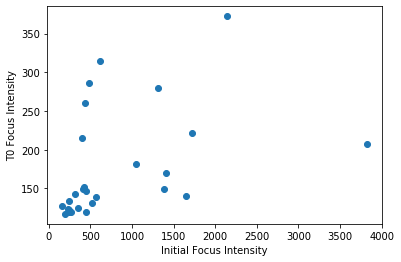

In [128]:
plt.scatter(x=prebleach_values['Mean(Focus)'], y=t0_values['Mean(Focus)']);
plt.xlabel('Initial Focus Intensity');
plt.ylabel('T0 Focus Intensity');

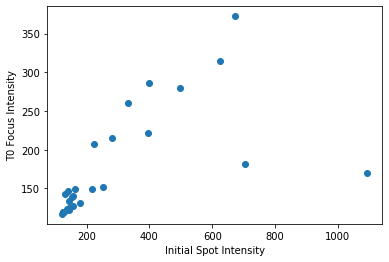

In [129]:
plt.scatter(x=prebleach_values['Mean(Spot)'], y=t0_values['Mean(Focus)']);
plt.xlabel('Initial Spot Intensity');
plt.ylabel('T0 Focus Intensity');

In [130]:
def final(df):
    
    final = df.iloc[90:100,1:].mean()
    final = pd.DataFrame(final).T
    
    return final

In [133]:
final_values = list()

for n, file in enumerate(files):

    df = getdata(input_folder, file)
    
    final_values.append(final(df))
    
final_values = pd.concat(final_values)
final_values.insert(0, 'File', files)
final_values.reset_index(inplace=True, drop=True)
final_values

c:\users\david brown\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,File,Mean(Bgd),Mean(Control_Focus),Mean(Control_Spot),Mean(Focus),Mean(Spot)
0,EML4-ALKv1_FRAP_10_Results.csv,113.7314,371.7886,122.1394,131.8733,122.6755
1,EML4-ALKv1_FRAP_11_Results.csv,114.2656,200.3225,119.1204,125.1556,121.0515
2,EML4-ALKv1_FRAP_12_Results.csv,113.1130,190.3453,134.8643,150.5979,136.6729
3,EML4-ALKv1_FRAP_13_Results.csv,114.6555,249.9372,169.7101,144.7248,138.5619
4,EML4-ALKv1_FRAP_14_Results.csv,115.4462,1567.8908,586.5994,246.6826,164.8087
5,EML4-ALKv1_FRAP_16_Results.csv,114.5995,474.9301,198.4878,433.1297,137.7659
6,EML4-ALKv1_FRAP_1_Results.csv,114.0813,216.3156,124.7618,176.4104,122.9046
7,EML4-ALKv1_FRAP_2_Results.csv,113.5065,540.3578,147.8730,155.6856,153.6265
8,EML4-ALKv1_FRAP_3_Results.csv,113.6017,231.5536,132.8607,175.9772,131.2863
9,EML4-ALKv1_FRAP_4_Results.csv,114.5857,268.1650,145.8810,182.5184,134.4302


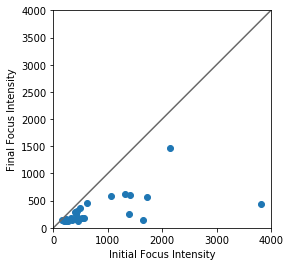

In [138]:
plt.scatter(x=prebleach_values['Mean(Focus)'], y=final_values['Mean(Focus)']);
plt.xlabel('Initial Focus Intensity');
plt.ylabel('Final Focus Intensity');
plt.xlim(0, 4000);
plt.ylim(0, 4000);
plt.gca().set_aspect('equal');
plt.plot([0,4000],[0,4000], c='dimgrey');

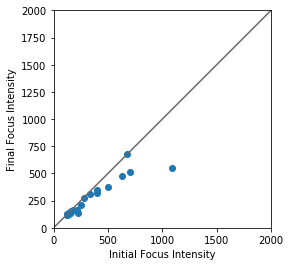

In [140]:
plt.scatter(x=prebleach_values['Mean(Spot)'], y=final_values['Mean(Spot)']);
plt.xlabel('Initial Focus Intensity');
plt.ylabel('Final Focus Intensity');
plt.xlim(0, 2000);
plt.ylim(0, 2000);
plt.gca().set_aspect('equal');
plt.plot([0,2000],[0,2000], c='dimgrey');

In [141]:
#Pull out the Protein based on Filename

In [146]:
def getFileInfo(filelist, **kwargs)->pd.DataFrame():
    """strip some information from the input file name"""
    
    #Get **kwargs
    search_list = kwargs.get('search_list', None)
    
    file_info = pd.DataFrame()
    
    #convert to lower case
    low_files = [file.lower() for file in filelist]
    
    file_info['File']     = range(len(filelist))
    file_info['ALKv1']    = ['alkv1'    in file for file in low_files]
    file_info['ALKv3']    = ['alkv3'    in file for file in low_files]
    file_info['ALKv5']    = ['alkv5'    in file for file in low_files]
    file_info['Ret']      = ['ret'      in file for file in low_files]
    
    if search_list is not None:
        
        for term in search_list:
            file_info[term] = [term.lower() in file for file in low_files]
    
    return file_info

In [161]:
file_info = getFileInfo(files)
file_info

,File,ALKv1,ALKv3,ALKv5,Ret
0,0,True,False,False,False
1,1,True,False,False,False
2,2,True,False,False,False
3,3,True,False,False,False
4,4,True,False,False,False
5,5,True,False,False,False
6,6,True,False,False,False
7,7,True,False,False,False
8,8,True,False,False,False
9,9,True,False,False,False


In [148]:
def combineClassifiers(data, input_columns, output_column, drop=False):
    """Combine mutually exclusive input_columns into a single catagorical output column."""
    
    data[output_column] = data[input_columns].idxmax(axis=1)
    
    if drop:
        data.drop(columns=input_columns)
        
    return data

In [162]:
combineClassifiers(file_info, ['ALKv1','ALKv3','ALKv5','Ret'], 'Protein', drop=False)

,File,ALKv1,ALKv3,ALKv5,Ret,Protein
0,0,True,False,False,False,ALKv1
1,1,True,False,False,False,ALKv1
2,2,True,False,False,False,ALKv1
3,3,True,False,False,False,ALKv1
4,4,True,False,False,False,ALKv1
5,5,True,False,False,False,ALKv1
6,6,True,False,False,False,ALKv1
7,7,True,False,False,False,ALKv1
8,8,True,False,False,False,ALKv1
9,9,True,False,False,False,ALKv1


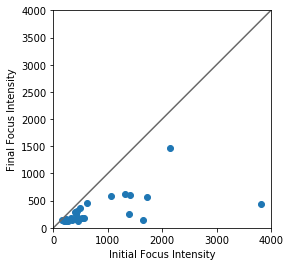

In [152]:
plt.scatter(x=prebleach_values['Mean(Focus)'], y=final_values['Mean(Focus)']);
plt.xlabel('Initial Focus Intensity');
plt.ylabel('Final Focus Intensity');
plt.xlim(0, 4000);
plt.ylim(0, 4000);
plt.gca().set_aspect('equal');
plt.plot([0,4000],[0,4000], c='dimgrey');

In [153]:
# Combine initial, t0 and final dataframes into one.

In [154]:
# First, rename the columns (we want them in thr right order too)

In [177]:
Protein = file_info['Protein']
Protein = pd.DataFrame(Protein)
Protein

,Protein
0,ALKv1
1,ALKv1
2,ALKv1
3,ALKv1
4,ALKv1
5,ALKv1
6,ALKv1
7,ALKv1
8,ALKv1
9,ALKv1


In [170]:
prebleach_values

,File,Initial_Background,Initial_Control_Focus,Initial_Control_Spot,Initial_Focus,Initial_Spot
0,EML4-ALKv1_FRAP_10_Results.csv,113.675714,400.106000,124.434571,267.144429,127.203571
1,EML4-ALKv1_FRAP_11_Results.csv,114.210000,205.458000,120.193286,189.503714,122.808286
2,EML4-ALKv1_FRAP_12_Results.csv,113.343143,209.415143,140.734000,241.954571,142.179286
3,EML4-ALKv1_FRAP_13_Results.csv,114.471429,239.760000,177.461286,164.263714,155.141429
4,EML4-ALKv1_FRAP_14_Results.csv,115.136429,2070.260714,274.183714,1389.321286,216.406714
5,EML4-ALKv1_FRAP_16_Results.csv,114.884429,753.751143,135.642143,3821.516857,222.020429
6,EML4-ALKv1_FRAP_1_Results.csv,114.104714,240.492000,124.025429,317.131143,130.972429
7,EML4-ALKv1_FRAP_2_Results.csv,113.385143,542.163429,143.269571,414.487429,163.597714
8,EML4-ALKv1_FRAP_3_Results.csv,113.818714,207.461000,136.815571,444.892571,140.257143
9,EML4-ALKv1_FRAP_4_Results.csv,114.576714,331.360714,145.720286,564.296000,151.804571


In [167]:
list(prebleach_values.columns)

['File',
 'Mean(Bgd)',
 'Mean(Control_Focus)',
 'Mean(Control_Spot)',
 'Mean(Focus)',
 'Mean(Spot)']

In [169]:
prebleach_values.columns = ['File',
                            'Initial_Background',
                            'Initial_Control_Focus',
                            'Initial_Control_Spot',
                            'Initial_Focus',
                            'Initial_Spot']

In [179]:
combined_df = pd.concat([Protein, prebleach_values], axis=1)
combined_df

,Protein,File,Initial_Background,Initial_Control_Focus,Initial_Control_Spot,Initial_Focus,Initial_Spot
0,ALKv1,EML4-ALKv1_FRAP_10_Results.csv,113.675714,400.106000,124.434571,267.144429,127.203571
1,ALKv1,EML4-ALKv1_FRAP_11_Results.csv,114.210000,205.458000,120.193286,189.503714,122.808286
2,ALKv1,EML4-ALKv1_FRAP_12_Results.csv,113.343143,209.415143,140.734000,241.954571,142.179286
3,ALKv1,EML4-ALKv1_FRAP_13_Results.csv,114.471429,239.760000,177.461286,164.263714,155.141429
4,ALKv1,EML4-ALKv1_FRAP_14_Results.csv,115.136429,2070.260714,274.183714,1389.321286,216.406714
5,ALKv1,EML4-ALKv1_FRAP_16_Results.csv,114.884429,753.751143,135.642143,3821.516857,222.020429
6,ALKv1,EML4-ALKv1_FRAP_1_Results.csv,114.104714,240.492000,124.025429,317.131143,130.972429
7,ALKv1,EML4-ALKv1_FRAP_2_Results.csv,113.385143,542.163429,143.269571,414.487429,163.597714
8,ALKv1,EML4-ALKv1_FRAP_3_Results.csv,113.818714,207.461000,136.815571,444.892571,140.257143
9,ALKv1,EML4-ALKv1_FRAP_4_Results.csv,114.576714,331.360714,145.720286,564.296000,151.804571


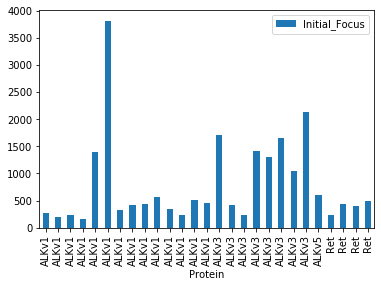

In [184]:
combined_df.plot.bar('Protein', 'Initial_Focus');

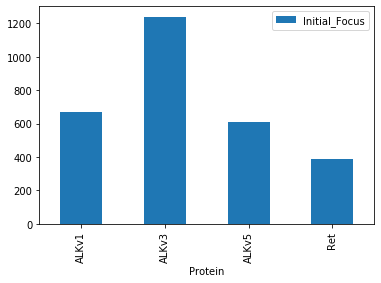

In [186]:
combined_df.groupby(by='Protein').mean().plot.bar(y='Initial_Focus');

In [215]:
Protein.Protein.unique()

array(['ALKv1', 'ALKv3', 'ALKv5', 'Ret'], dtype=object)

In [202]:
#Convert categories to numeric code
index, labels = Protein.Protein.factorize()
index

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 3, 3, 3, 3], dtype=int64)

In [208]:
colours=list()
for digit in index:
    colours.append('C'+str(digit))
colours

['C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C2',
 'C3',
 'C3',
 'C3',
 'C3']

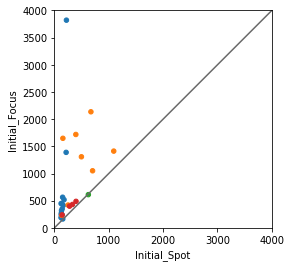

In [226]:
combined_df.plot('Initial_Spot', 'Initial_Focus', kind='scatter', c=colours);
plt.xlim(0, 4000);
plt.ylim(0, 4000);
plt.gca().set_aspect('equal');
plt.plot([0,4000],[0,4000], c='dimgrey');

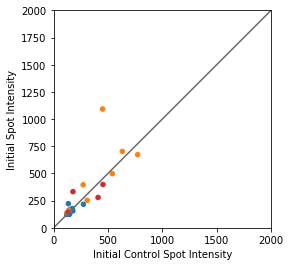

In [225]:
combined_df.plot('Initial_Control_Spot', 'Initial_Spot', kind='scatter', c=colours);
plt.xlabel('Initial Control Spot Intensity');
plt.ylabel('Initial Spot Intensity');
plt.xlim(0, 2000);
plt.ylim(0, 2000);
plt.gca().set_aspect('equal');
plt.plot([0,2000],[0,2000], c='dimgrey');

In [223]:
fig, ax = plt.

for row in combined_df.iterrows():
    
    
    print(row)

(0, Protein                                           ALKv1
File                     EML4-ALKv1_FRAP_10_Results.csv
Initial_Background                              113.676
Initial_Control_Focus                           400.106
Initial_Control_Spot                            124.435
Initial_Focus                                   267.144
Initial_Spot                                    127.204
Name: 0, dtype: object)
(1, Protein                                           ALKv1
File                     EML4-ALKv1_FRAP_11_Results.csv
Initial_Background                               114.21
Initial_Control_Focus                           205.458
Initial_Control_Spot                            120.193
Initial_Focus                                   189.504
Initial_Spot                                    122.808
Name: 1, dtype: object)
(2, Protein                                           ALKv1
File                     EML4-ALKv1_FRAP_12_Results.csv
Initial_Background                          

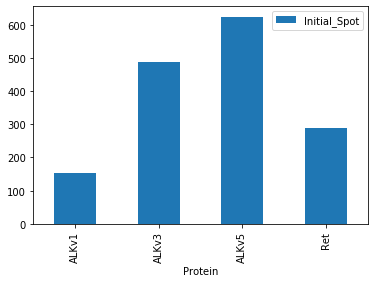

In [187]:
combined_df.groupby(by='Protein').mean().plot.bar(y='Initial_Spot');

In [227]:
##Combine the other dataframes

In [228]:
t0_values.columns = ['File',
                            't0_Background',
                            't0_Control_Focus',
                            't0_Control_Spot',
                            't0_Focus',
                            't0_Spot']

In [229]:
final_values.columns = ['File',
                            'Final_Background',
                            'Final_Control_Focus',
                            'Final_Control_Spot',
                            'Final_Focus',
                            'Final_Spot']

In [232]:
t0_values.drop(columns='File')

,t0_Background,t0_Control_Focus,t0_Control_Spot,t0_Focus,t0_Spot
0,113.427,369.546,121.847,118.887,117.495
1,113.898,209.340,119.582,117.021,116.505
2,112.898,205.216,140.051,122.711,120.372
3,114.410,254.258,173.531,127.268,125.372
4,115.454,1963.814,256.643,149.237,135.179
5,114.509,676.546,147.005,206.918,120.781
6,113.925,238.474,123.964,143.144,117.628
7,113.382,546.227,145.061,149.041,129.112
8,114.648,211.093,134.714,146.742,124.852
9,114.253,298.732,143.245,138.835,122.138


In [233]:
combined_df = pd.concat([Protein, prebleach_values, t0_values.drop(columns='File'), final_values.drop(columns='File')], axis=1)
combined_df

,Protein,File,Initial_Background,Initial_Control_Focus,Initial_Control_Spot,Initial_Focus,Initial_Spot,t0_Background,t0_Control_Focus,t0_Control_Spot,t0_Focus,t0_Spot,Final_Background,Final_Control_Focus,Final_Control_Spot,Final_Focus,Final_Spot
0,ALKv1,EML4-ALKv1_FRAP_10_Results.csv,113.675714,400.106000,124.434571,267.144429,127.203571,113.427,369.546,121.847,118.887,117.495,113.7314,371.7886,122.1394,131.8733,122.6755
1,ALKv1,EML4-ALKv1_FRAP_11_Results.csv,114.210000,205.458000,120.193286,189.503714,122.808286,113.898,209.340,119.582,117.021,116.505,114.2656,200.3225,119.1204,125.1556,121.0515
2,ALKv1,EML4-ALKv1_FRAP_12_Results.csv,113.343143,209.415143,140.734000,241.954571,142.179286,112.898,205.216,140.051,122.711,120.372,113.1130,190.3453,134.8643,150.5979,136.6729
3,ALKv1,EML4-ALKv1_FRAP_13_Results.csv,114.471429,239.760000,177.461286,164.263714,155.141429,114.410,254.258,173.531,127.268,125.372,114.6555,249.9372,169.7101,144.7248,138.5619
4,ALKv1,EML4-ALKv1_FRAP_14_Results.csv,115.136429,2070.260714,274.183714,1389.321286,216.406714,115.454,1963.814,256.643,149.237,135.179,115.4462,1567.8908,586.5994,246.6826,164.8087
5,ALKv1,EML4-ALKv1_FRAP_16_Results.csv,114.884429,753.751143,135.642143,3821.516857,222.020429,114.509,676.546,147.005,206.918,120.781,114.5995,474.9301,198.4878,433.1297,137.7659
6,ALKv1,EML4-ALKv1_FRAP_1_Results.csv,114.104714,240.492000,124.025429,317.131143,130.972429,113.925,238.474,123.964,143.144,117.628,114.0813,216.3156,124.7618,176.4104,122.9046
7,ALKv1,EML4-ALKv1_FRAP_2_Results.csv,113.385143,542.163429,143.269571,414.487429,163.597714,113.382,546.227,145.061,149.041,129.112,113.5065,540.3578,147.8730,155.6856,153.6265
8,ALKv1,EML4-ALKv1_FRAP_3_Results.csv,113.818714,207.461000,136.815571,444.892571,140.257143,114.648,211.093,134.714,146.742,124.852,113.6017,231.5536,132.8607,175.9772,131.2863
9,ALKv1,EML4-ALKv1_FRAP_4_Results.csv,114.576714,331.360714,145.720286,564.296000,151.804571,114.253,298.732,143.245,138.835,122.138,114.5857,268.1650,145.8810,182.5184,134.4302


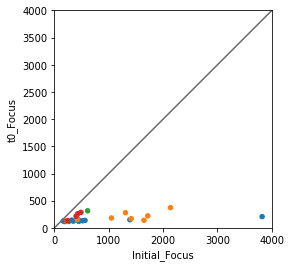

In [234]:
combined_df.plot('Initial_Focus', 't0_Focus', kind='scatter', c=colours);

plt.xlim(0, 4000);
plt.ylim(0, 4000);
plt.gca().set_aspect('equal');
plt.plot([0,4000],[0,4000], c='dimgrey');

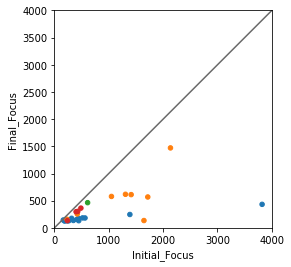

In [235]:
combined_df.plot('Initial_Focus', 'Final_Focus', kind='scatter', c=colours);

plt.xlim(0, 4000);
plt.ylim(0, 4000);
plt.gca().set_aspect('equal');
plt.plot([0,4000],[0,4000], c='dimgrey');

In [236]:
combined_df

,Protein,File,Initial_Background,Initial_Control_Focus,Initial_Control_Spot,Initial_Focus,Initial_Spot,t0_Background,t0_Control_Focus,t0_Control_Spot,t0_Focus,t0_Spot,Final_Background,Final_Control_Focus,Final_Control_Spot,Final_Focus,Final_Spot
0,ALKv1,EML4-ALKv1_FRAP_10_Results.csv,113.675714,400.106000,124.434571,267.144429,127.203571,113.427,369.546,121.847,118.887,117.495,113.7314,371.7886,122.1394,131.8733,122.6755
1,ALKv1,EML4-ALKv1_FRAP_11_Results.csv,114.210000,205.458000,120.193286,189.503714,122.808286,113.898,209.340,119.582,117.021,116.505,114.2656,200.3225,119.1204,125.1556,121.0515
2,ALKv1,EML4-ALKv1_FRAP_12_Results.csv,113.343143,209.415143,140.734000,241.954571,142.179286,112.898,205.216,140.051,122.711,120.372,113.1130,190.3453,134.8643,150.5979,136.6729
3,ALKv1,EML4-ALKv1_FRAP_13_Results.csv,114.471429,239.760000,177.461286,164.263714,155.141429,114.410,254.258,173.531,127.268,125.372,114.6555,249.9372,169.7101,144.7248,138.5619
4,ALKv1,EML4-ALKv1_FRAP_14_Results.csv,115.136429,2070.260714,274.183714,1389.321286,216.406714,115.454,1963.814,256.643,149.237,135.179,115.4462,1567.8908,586.5994,246.6826,164.8087
5,ALKv1,EML4-ALKv1_FRAP_16_Results.csv,114.884429,753.751143,135.642143,3821.516857,222.020429,114.509,676.546,147.005,206.918,120.781,114.5995,474.9301,198.4878,433.1297,137.7659
6,ALKv1,EML4-ALKv1_FRAP_1_Results.csv,114.104714,240.492000,124.025429,317.131143,130.972429,113.925,238.474,123.964,143.144,117.628,114.0813,216.3156,124.7618,176.4104,122.9046
7,ALKv1,EML4-ALKv1_FRAP_2_Results.csv,113.385143,542.163429,143.269571,414.487429,163.597714,113.382,546.227,145.061,149.041,129.112,113.5065,540.3578,147.8730,155.6856,153.6265
8,ALKv1,EML4-ALKv1_FRAP_3_Results.csv,113.818714,207.461000,136.815571,444.892571,140.257143,114.648,211.093,134.714,146.742,124.852,113.6017,231.5536,132.8607,175.9772,131.2863
9,ALKv1,EML4-ALKv1_FRAP_4_Results.csv,114.576714,331.360714,145.720286,564.296000,151.804571,114.253,298.732,143.245,138.835,122.138,114.5857,268.1650,145.8810,182.5184,134.4302


In [241]:
combined_df['Percent_Intensity_After_Bleaching_Focus'] = combined_df.t0_Focus.subtract(combined_df.t0_Background).divide(combined_df.Initial_Focus.subtract(combined_df.Initial_Background))*100

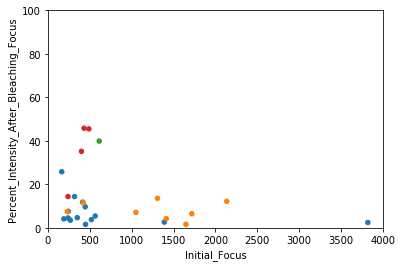

In [243]:
combined_df.plot('Initial_Focus', 'Percent_Intensity_After_Bleaching_Focus', kind='scatter', c=colours);

plt.xlim(0, 4000);
plt.ylim(0, 100);

In [245]:
combined_df['Focus_to_Spot_Ratio'] = combined_df.Initial_Focus.subtract(combined_df.Initial_Background).divide(combined_df.Initial_Spot.subtract(combined_df.Initial_Background))

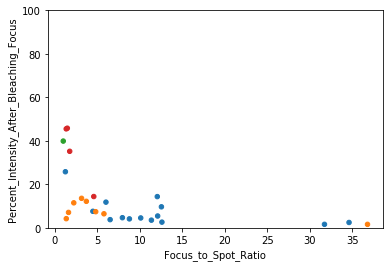

In [246]:
combined_df.plot('Focus_to_Spot_Ratio', 'Percent_Intensity_After_Bleaching_Focus', kind='scatter', c=colours);

plt.ylim(0, 100);

In [247]:
df

,Frame,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Mean(Bgd)
0,1,485.495,394.949,527.608,446.633,118.481
1,2,486.825,392.577,531.227,453.770,118.249
2,3,485.691,397.776,518.165,447.194,119.307
3,4,486.330,397.082,538.608,460.464,118.724
4,5,488.412,398.903,528.670,459.816,118.621
...,...,...,...,...,...,...
95,96,363.680,349.321,462.722,422.474,118.427
96,97,372.814,351.092,454.814,415.087,117.584
97,98,363.124,349.214,470.866,419.036,118.386
98,99,371.103,353.964,454.495,413.561,117.945


In [250]:
sub = subtract_background(df)
sub

,Frame,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot)
0,1,367.014,276.468,409.127,328.152
1,2,368.576,274.328,412.978,335.521
2,3,366.384,278.469,398.858,327.887
3,4,367.606,278.358,419.884,341.740
4,5,369.791,280.282,410.049,341.195
...,...,...,...,...,...
95,96,245.253,230.894,344.295,304.047
96,97,255.230,233.508,337.230,297.503
97,98,244.738,230.828,352.480,300.650
98,99,253.158,236.019,336.550,295.616


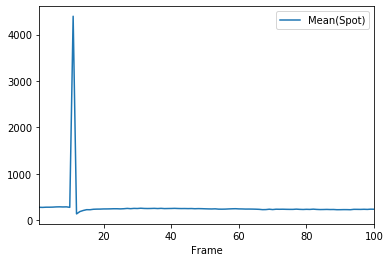

In [252]:
sub.plot('Frame', 'Mean(Spot)');